In [2]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

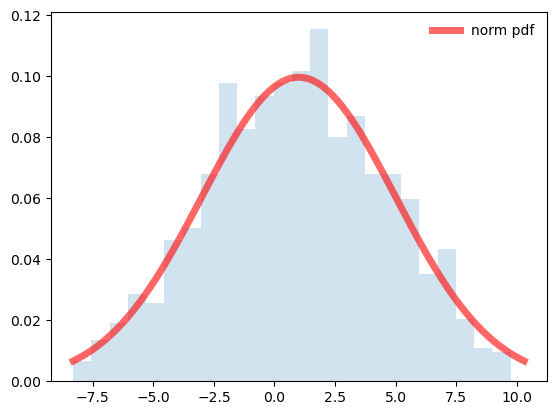

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.9547875841717323
Sample variance: 15.721693435218082


In [3]:
#1. Normal

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

# A normal continuous random variable.
# As an instance of the rv_continuous class, norm object inherits from it a collection of generic methods, 
# and completes them with details specific for this particular distribution.

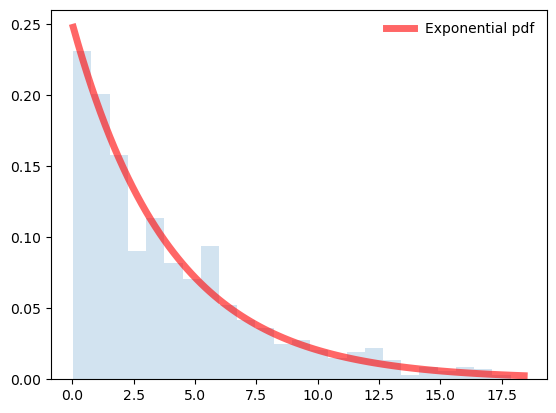

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.1721880590400975
Sample variance: 17.058375258184476


In [4]:
#2. Exponential

dist = expon(scale=4)
x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, dist.pdf(x), 'r-', lw=5, alpha=0.6, label='Exponential pdf')
r = dist.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print(f"Distribution mean: {dist.stats(moments='m')}")
print(f"Distribution variance: {dist.stats(moments='v')}")
print(f"Sample mean: {np.mean(r)}")
print(f"Sample variance: {np.var(r)}")

# Expon - An exponential continuous random variable.
# As an instance of the rv_continuous class, expon object inherits from it a collection of generic methods, 
# and completes them with details specific for this particular distribution.

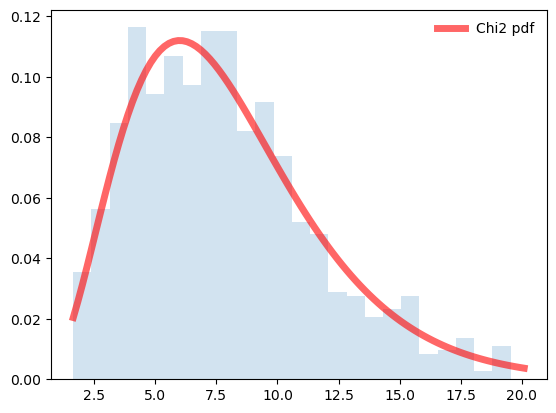

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 7.975070858645147
Sample variance: 16.542162252775874


In [5]:
#3. chi2

dist = chi2(df=8)
x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, dist.pdf(x), 'r-', lw=5, alpha=0.6, label='Chi2 pdf')
r = dist.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print(f"Distribution mean: {dist.stats(moments='m')}")
print(f"Distribution variance: {dist.stats(moments='v')}")
print(f"Sample mean: {np.mean(r)}")
print(f"Sample variance: {np.var(r)}")

# chi2 - A chi-squared continuous random variable.
# As an instance of the rv_continuous class, chi2 object inherits from it a collection of generic methods
# and completes them with details specific for this particular distribution.

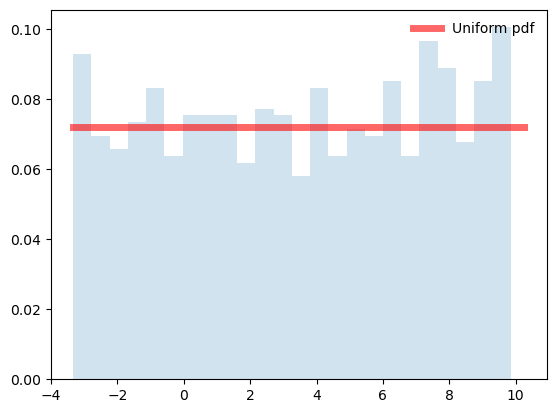

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.6065212921059193
Sample variance: 16.906810930383905


In [6]:
#3. uniform

dist = uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3))
x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, dist.pdf(x), 'r-', lw=5, alpha=0.6, label='Uniform pdf')
r = dist.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print(f"Distribution mean: {dist.stats(moments='m')}")
print(f"Distribution variance: {dist.stats(moments='v')}")
print(f"Sample mean: {np.mean(r)}")
print(f"Sample variance: {np.var(r)}")

# uniform - A uniform continuous random variable.
# In the standard form, the distribution is uniform on [0, 1]. Using the parameters loc and scale, 
# one obtains the uniform distribution on [loc, loc + scale].
# As an instance of the rv_continuous class, uniform object inherits from it a collection of generic methods, 
# and completes them with details specific for this particular distribution.


# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

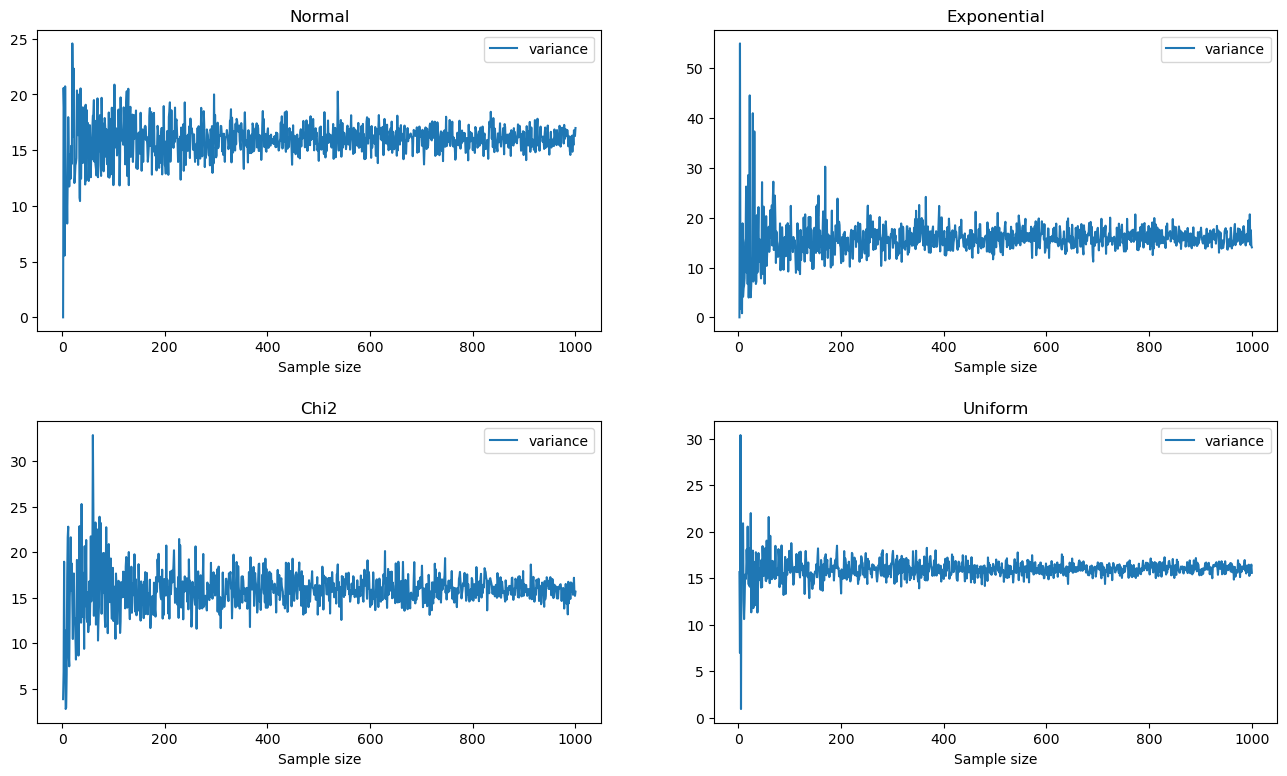

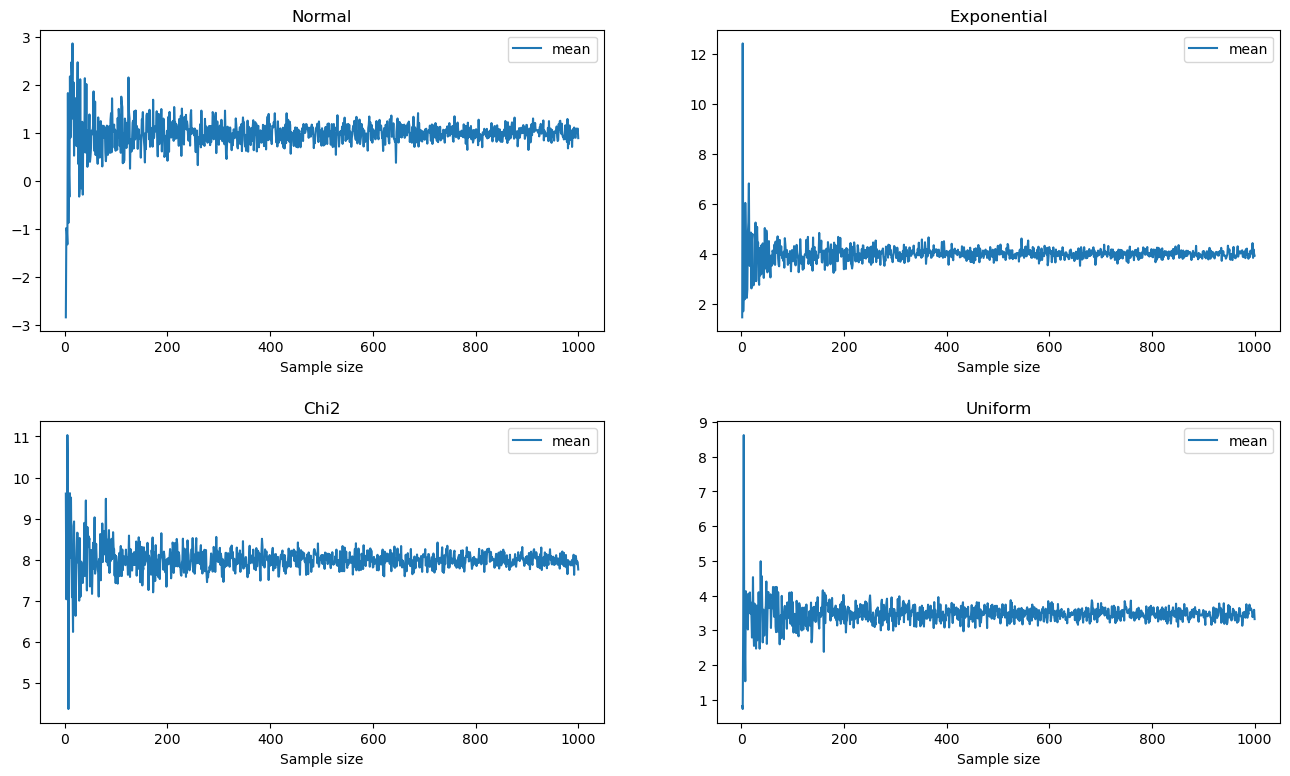

In [7]:
#here goes your code

names = ['Normal', 'Exponential', 'Chi2', 'Uniform']
distributions = [norm(loc=1, scale=4), expon(scale=4), chi2(df=8), uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3))]

def compute_stats(distribution, sample_size):
    samples = distribution.rvs(size=sample_size)
    return np.var(samples), np.mean(samples)

statistics = {name: {'variances': [], 'means': []} for name in names}
sample_size_range = (2, 1001)

for size in range(*sample_size_range):
    for dist, name in zip(distributions, names):
        variance, mean = compute_stats(dist, size)
        statistics[name]['variances'].append(variance)
        statistics[name]['means'].append(mean)
    
fig, axs = plt.subplots(2, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.3)
for i, key in enumerate(names):
    axs[i//2, i % 2].set_title(key)
    axs[i//2, i % 2].set_xlabel('Sample size')
    axs[i//2, i % 2].plot(range(*sample_size_range), statistics[key]['variances'], label='variance')
    axs[i//2, i % 2].legend()
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.3)
for i, key in enumerate(names):
    axs[i//2, i % 2].set_title(key)
    axs[i//2, i % 2].set_xlabel('Sample size')
    axs[i//2, i % 2].plot(range(*sample_size_range), statistics[key]['means'], label='mean')
    axs[i//2, i % 2].legend()
plt.show()


## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

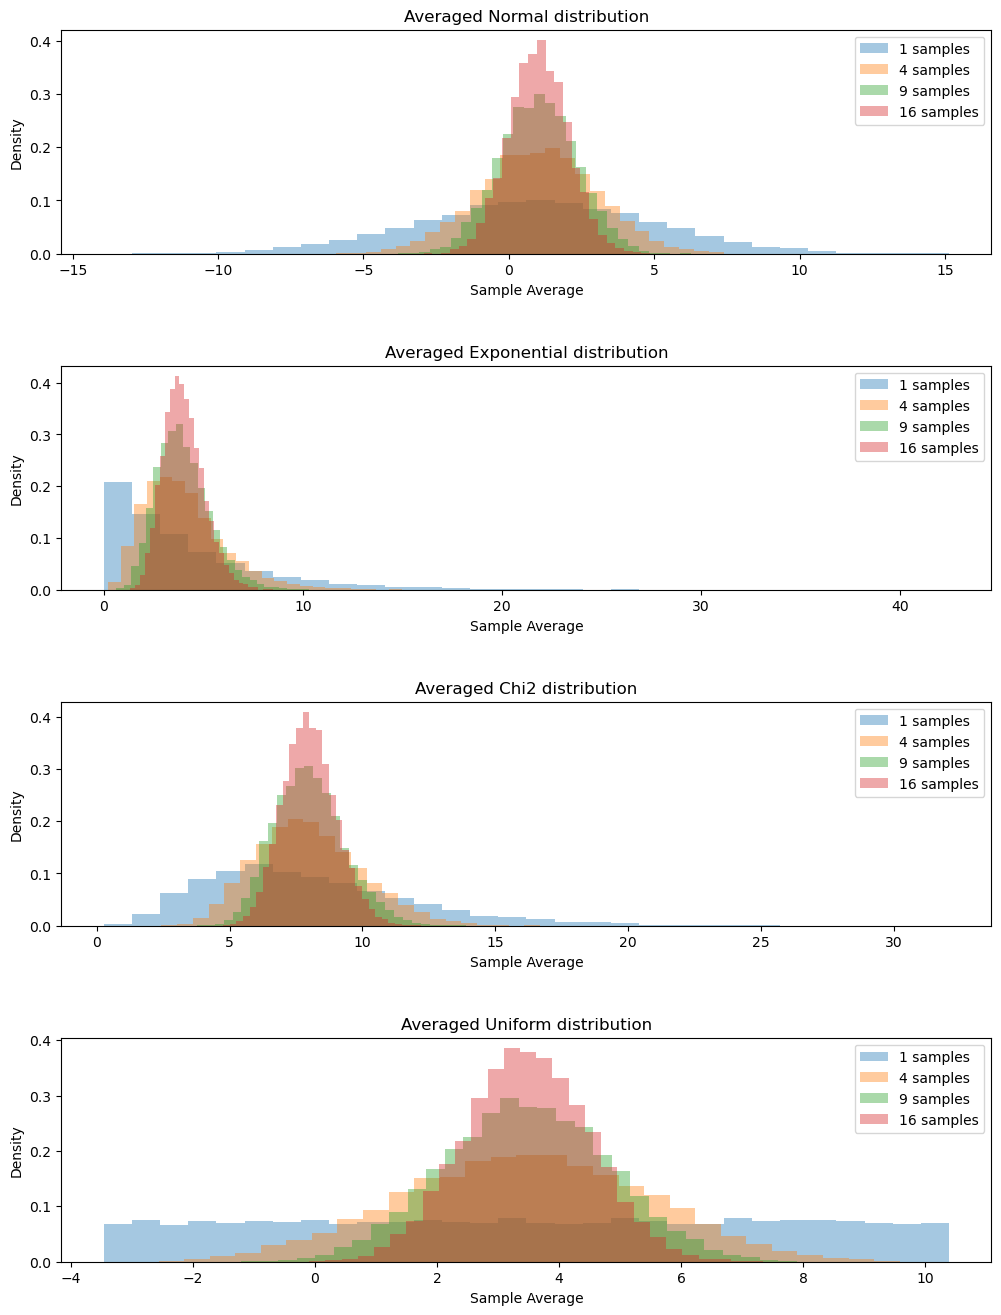

In [8]:
fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)

for idx, dist, dist_name in zip(list(range(4)), distributions, names):
    
    for N in [1, 4, 9, 16]:
        averages = [np.mean(dist.rvs(size=N)) for _ in range(10000)]
        axis[idx].hist(averages, density=True, bins=30, alpha=0.4, label=f'{N} samples')
    axis[idx].legend()
    axis[idx].set_title(f'Averaged {dist_name} distribution')
    axis[idx].set_xlabel('Sample Average')
    axis[idx].set_ylabel('Density')
    
plt.show()

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

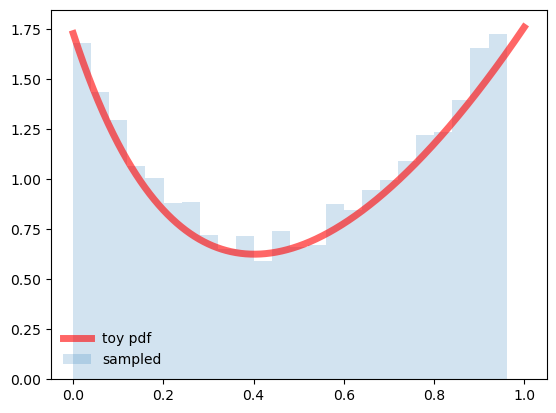

In [9]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    sample = []
    m = max(dist)
    while len(sample) < size:
        u = uniform.rvs(0, m)
        t = uniform.rvs(0, 1)
        if toy_dist(t) > u:
            sample.append(t)
    return sample

samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

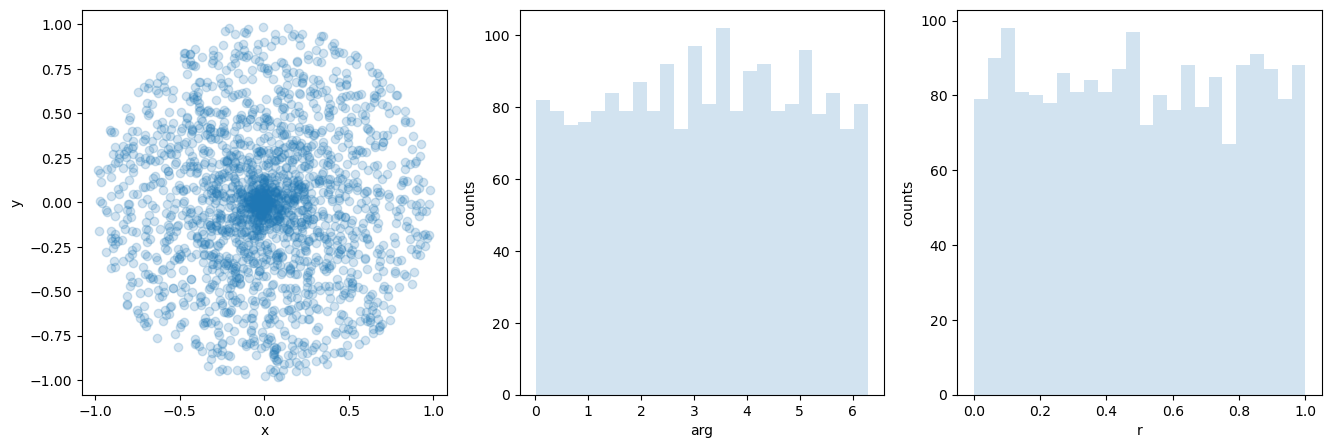

In [10]:
# Version1
# Assume uniform distribution of radius (0,1) and argument (0, 2 $\pi$)

uniform_radius = uniform(loc=0, scale=1)
uniform_argument = uniform(loc=0, scale=2*np.pi)

radius = uniform_radius.rvs(2000)
argument = uniform_argument.rvs(2000)

x = radius * np.sin(argument)
y = radius * np.cos(argument)

plt.figure(figsize=(16, 5))


# Subplot 1
plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')


# Subplot 2
plt.subplot(1, 3, 2)
plt.hist(argument, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('arg')
plt.ylabel('counts')


# Sublot 3
plt.subplot(1, 3, 3)
plt.hist(radius, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('r')
plt.ylabel('counts')

plt.show()

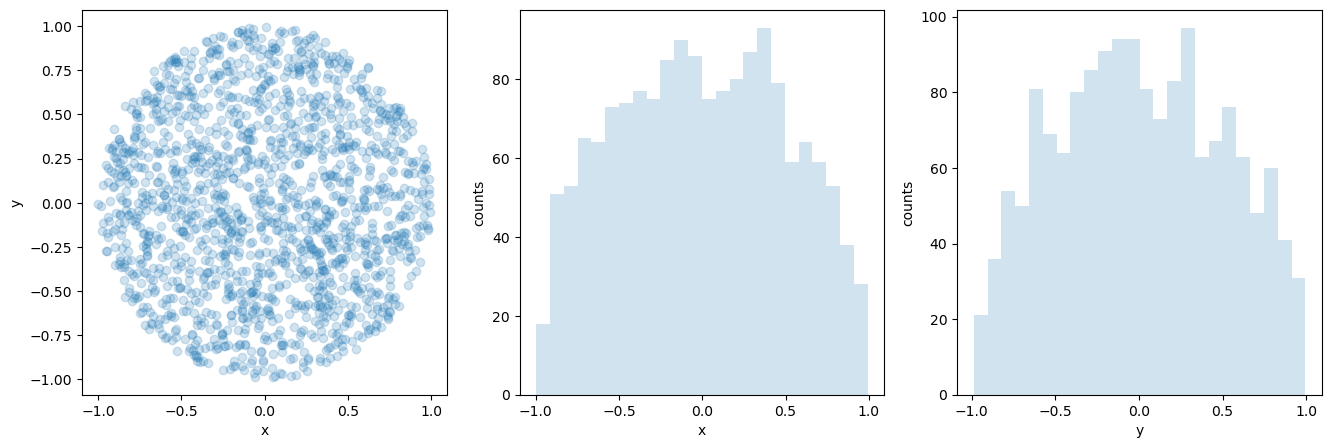

In [11]:
# Version2
# Assume uniform distribution of x and y coordinate (-1,1). 
# Drop values laying outside of the disk.

dist = uniform(loc=-1, scale=2)

x, y = [dist.rvs(2000) for _ in range(2)]
points = [(x_, y_) for x_, y_ in zip(x, y) if np.sqrt(x_*x_ + y_*y_) < 1]
x, y = zip(*points)

plt.figure(figsize=(16, 5))


# Subplot 1
plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')


# Subplot 2
plt.subplot(1, 3, 2)
plt.hist(x, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('x')
plt.ylabel('counts')


# Subplot 3 
plt.subplot(1, 3, 3)
plt.hist(y, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('y')
plt.ylabel('counts')

plt.show()

Version 3


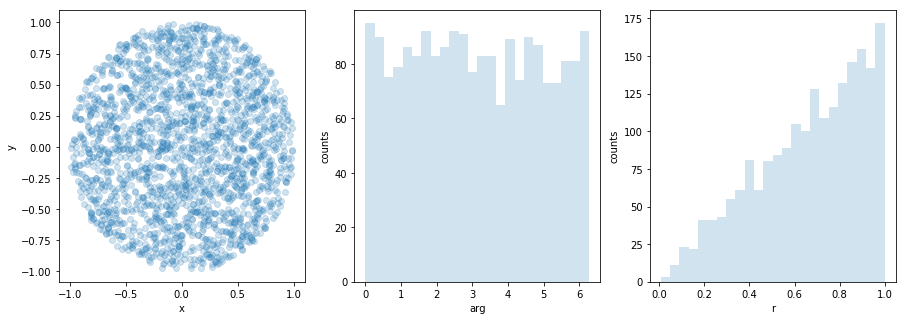

In [10]:
# Version3
# Modify the solution of point 1. by changing the distribution of the radius in such a way, 
# that we result in 2D distribution from 2.

uniform_radius = uniform(loc=0, scale=1)
uniform_argument = uniform(loc=0, scale=2*np.pi)

radius = np.sqrt(1 - uniform_radius.rvs(2000))
argument = uniform_argument.rvs(2000)

x = radius * np.sin(argument)
y = radius * np.cos(argument)

plt.figure(figsize=(16, 5))


# Subplot 1
plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')


# Subplot 2
plt.subplot(1, 3, 2)
plt.hist(argument, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('arg')
plt.ylabel('counts')


# Subplot 3
plt.subplot(1, 3, 3)
plt.hist(radius, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('r')
plt.ylabel('counts')

plt.show()

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [11]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

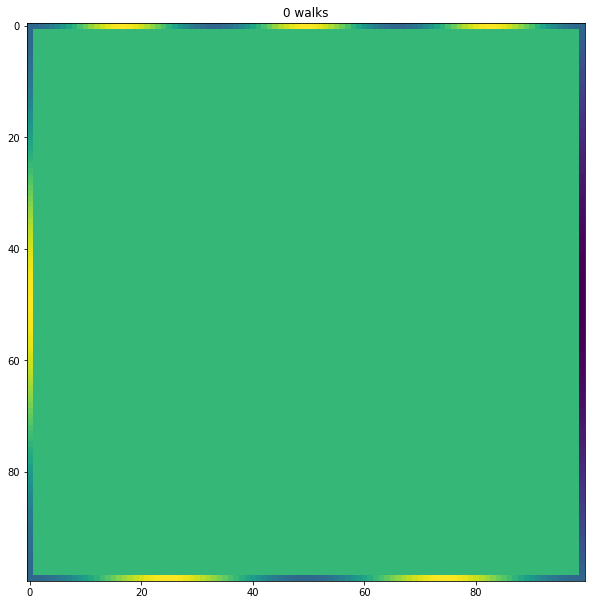

In [12]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

In [13]:
#here goes your code

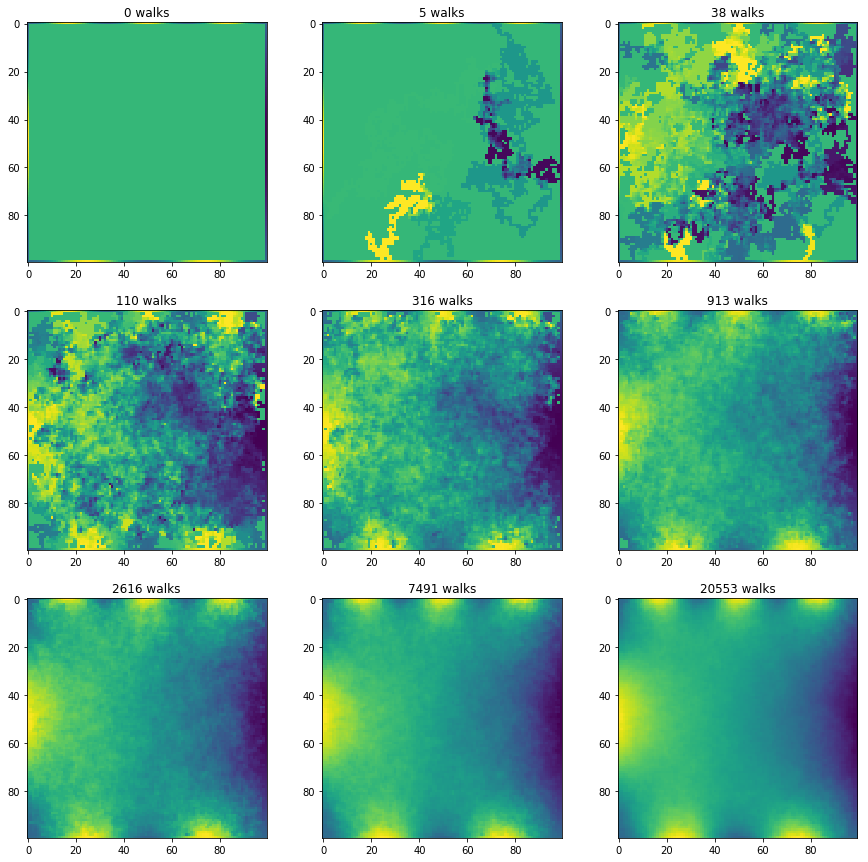

In [16]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation 

fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(planes[0])
im.set_array(planes[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(planes[j])
    plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=1000)
plt.show()